In [2]:
import pandas as pd
import numpy as np

In [ ]:
dataSet = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"], 
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"], 
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"], 
    "PlayTennis": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}

data = pd.DataFrame(dataSet)

data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
from sklearn import preprocessing

# Label encoding
outlook, temperature, humidity, wind, play = [], [], [], [], []
label_encoder = preprocessing.LabelEncoder()
cur=[]
for index, row in data.iterrows():
  cur.append(row["Outlook"])
  if(index == 13):
    outlook = cur
outlook_encoded = label_encoder.fit_transform(outlook)
cur=[]
for index, row in data.iterrows():
  cur.append(row["Temperature"])
  if(index == 13):
    temperature = cur
temperature_encoded = label_encoder.fit_transform(temperature)
cur=[]
for index, row in data.iterrows():
  cur.append(row["Humidity"])
  if(index == 13):
    humidity = cur
humidity_encoded = label_encoder.fit_transform(humidity)
cur=[]
for index, row in data.iterrows():
  cur.append(row["Wind"])
  if(index == 13):
    wind = cur
wind_encoded = label_encoder.fit_transform(wind)
cur=[]
for index, row in data.iterrows():
  cur.append(row["PlayTennis"])
  if(index == 13):
    play = cur
play_encoded = label_encoder.fit_transform(play)

print("Outlook:", outlook_encoded)
print("Temperature: ", temperature_encoded)
print("Humidity: ", humidity_encoded)
print("Wind: ", wind_encoded)
print("Play: ", play_encoded)

Outlook: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temperature:  [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity:  [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind:  [1 0 1 1 1 0 0 1 1 1 0 0 1 0]
Play:  [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
features = list(zip(outlook_encoded, temperature_encoded, humidity_encoded, wind_encoded))

features

[(2, 1, 0, 1),
 (2, 1, 0, 0),
 (0, 1, 0, 1),
 (1, 2, 0, 1),
 (1, 0, 1, 1),
 (1, 0, 1, 0),
 (0, 0, 1, 0),
 (2, 2, 0, 1),
 (2, 0, 1, 1),
 (1, 2, 1, 1),
 (2, 2, 1, 0),
 (0, 2, 0, 0),
 (0, 1, 1, 1),
 (1, 2, 0, 0)]

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(features,play_encoded)

predicted_1 = model.predict([[2, 0, 0, 1]]) # Sunny, Cool, High, Weak
predicted_2 = model.predict([[1, 1, 0, 1]]) # Rain, Hot, High, Weak

print(predicted_1)
print(predicted_2)

[0]
[1]


In [ ]:
# zip() function returns a zip object, which is an iterator of tuples on which the play 
# column depends. Thus, this will zip the deciding columns as a single unit
X = list(zip(outlook_encoded, temperature_encoded, humidity_encoded, wind_encoded))
Y = play_encoded

print("X: ", X)
print("Y: ", Y)

X:  [(2, 1, 0, 1), (2, 1, 0, 0), (0, 1, 0, 1), (1, 2, 0, 1), (1, 0, 1, 1), (1, 0, 1, 0), (0, 0, 1, 0), (2, 2, 0, 1), (2, 0, 1, 1), (1, 2, 1, 1), (2, 2, 1, 0), (0, 2, 0, 0), (0, 1, 1, 1), (1, 2, 0, 0)]
Y:  [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
# DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset 
# based on either cart(Gini) or ID3(Entropy/Information gain) 
from sklearn import tree
clf_gini = tree.DecisionTreeClassifier(criterion = 'gini')
clf_gini = clf_gini.fit(X, Y)
clf_ig = tree.DecisionTreeClassifier(criterion = 'entropy')
clf_ig = clf_ig.fit(X, Y)

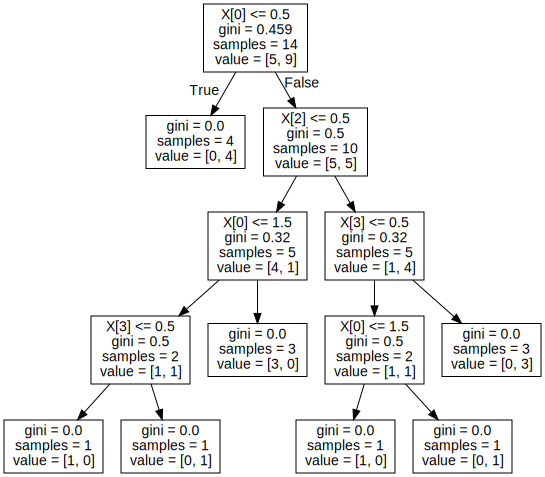

In [ ]:
import graphviz 
# Creating the graph using gini as impurity index
data_gini = tree.export_graphviz(clf_gini, out_file=None) 
graph_gini = graphviz.Source(data_gini) 

graph_gini

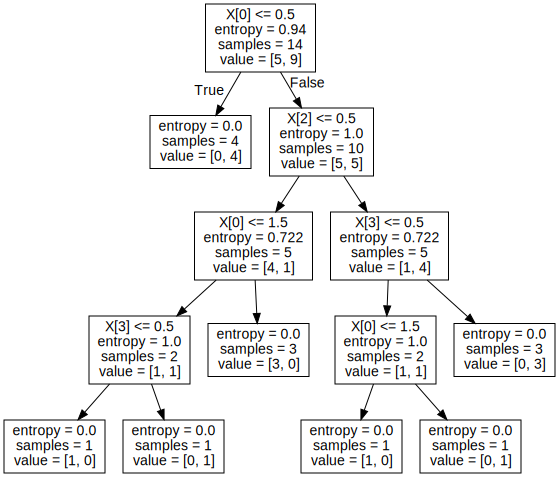

In [ ]:
import graphviz 
# Creating the graph using information gain as impurity index
data_ig = tree.export_graphviz(clf_ig, out_file=None)
graph_ig = graphviz.Source(data_ig)

graph_ig

In [ ]:
# From the encoded data we can decifer the following:
# Outlook:     Sunny-2, Overcast-0, Rain-1
# Temperature: Hot-1, Mild-2, Cool-0
# Humidity:    High-0, Normal-1
# Wind:        Weak-1, Strong-0
# Play:        No-0, Yes-1

# Using Gini

gini_predicted_1 = clf_gini.predict([(2, 0, 0, 1)]) # Sunny, Cool, High, Weak
gini_predicted_2 = clf_gini.predict([(1, 1, 0, 1)]) # Rain, Hot, High, Weak

print("Using gini as impurity index: ")
print(gini_predicted_1)
print(gini_predicted_2)
print()

# Usig Information gain

ig_predicted_1 = clf_ig.predict([(2, 0, 0, 1)]) # Sunny, Cool, High, Weak
ig_predicted_2 = clf_ig.predict([(1, 1, 0, 1)]) # Rain, Hot, High, Weak

print("Using information gain as impurity index: ")
print(ig_predicted_1)
print(ig_predicted_2)

NameError: name 'clf_gini' is not defined

In [ ]:
training_data = data
testing_data = data

# This function calculates the entropy of the whole dataset
def find_dataset_entropy(train_data, label, class_items):
    # Find the total number of rows
    rows = train_data.shape[0]
    # Resultant entropy to be returned
    entropy = 0
    
    # For each class variable (Yes/No), Calculates its respective entropy
    for item in class_items:
        # Number of times a particual vaiable appears in the respective column
        cur_item_count = train_data[train_data[label] == item].shape[0]
        # Entropy of the current item
        cur_item_entropy = - (cur_item_count/rows)*np.log2(cur_item_count/rows) 
        # Add it to our entropy to be returned
        entropy += cur_item_entropy
    
    # Return the resultant entropy
    return entropy 

# Calculating entropy of a filtered dataset based on a specific feature
def calculate_feature_entropy(feature_data, label, class_items):
    # feature_data contains rows that have a specific value of a feature
    # class_count will basically contain the total number of raws of the 
    # current dataframe
    class_count = feature_data.shape[0]
    entropy = 0
    
    for item in class_items:
        # Number of times a particular item appears 
        cur_item_count = feature_data[feature_data[label] == item].shape[0]
    
        cur_item_entropy = 0
        if cur_item_count != 0: # To avoid divide by zero exception
            cur_item_entropy = - (cur_item_count/class_count) * np.log2(cur_item_count/class_count) 
        
        # Add it to out entropy to be returned
        entropy += cur_item_entropy
        
    # Return the resultant entropy
    return entropy

# This funciton would calculate information gain for a particular feature
def calculate_information_gain(feature_name, train_data, label, class_items):
    # This is a list of unique items pertaining to a specific feature
    items_list = train_data[feature_name].unique()
    rows = train_data.shape[0]
    feature_information = 0.0
    
    for item in items_list:
        # This will fetch all the rows from the train data where feature_name = item
        item_data = train_data[train_data[feature_name] == item]
        # Number of times a particular item appears in the train data
        item_count = item_data.shape[0]
        # Calculating the entropy of a specific item
        item_entropy = calculate_feature_entropy(item_data, label, class_items)
        item_probability = item_count/rows
        feature_information += item_probability * item_entropy
        
    # Entropy a feature = total entropy of the dataset - information of that feature 
    return find_dataset_entropy(train_data, label, class_items) - feature_information

# Caculates the most informative feature ie the feature with highest information gain
def most_informative_feature(train_data, label, class_items):
    # This list contains the features on which our output would depend
    feature_list = train_data.columns.drop(label)
    # Initialize the variables 
    max_info_gain = -1
    max_info_feature = None
    
    for feature in feature_list:  
        # For the current feature calculate the information gain
        feature_info_gain = calculate_information_gain(feature, train_data, label, class_items)
        # If the maximum informatino gain until now is smaller than the current gain
        if max_info_gain < feature_info_gain:
            # Update the maximum information gain with the current gain
            max_info_gain = feature_info_gain
            # Update the resultant feature to be returned
            max_info_feature = feature
    
    # Return the feature with max information gain
    return max_info_feature

# Once we have found current root of a tree this method would help in adding
# a node to the tree
def generate_sub_tree(feature_name, train_data, label, class_items):
    # feature_name is the name of the feature that we want to add to the tree
    featere_count_dict = train_data[feature_name].value_counts(sort=False)
    tree = {}
    
    for feature, count in featere_count_dict.iteritems():
        # For each (feature, count) pair in our dictionary
        # feature_data is the dataset containing the value of the feature_name as the 
        # current feaure
        feature_data = train_data[train_data[feature_name] == feature]
        
        # A flag to keep record if its assigned to a node 
        # In other words to check if the current feature value is a pure class or not
        assigned = False
        for item in class_items:
            # This counts the number of times item class appears in our dataset for a 
            # specific feature
            cur_class_count = feature_data[feature_data[label] == item].shape[0]

            # Now if the count of current class is same as the total count, 
            # this means that it is a pure class thus that feature in out tree can be assigned 
            # value as this item
            if cur_class_count == count:
                # Being pure class assign item as the value for this feature in our subtree
                tree[feature] = item
                # Remove the rows with this feature value
                train_data = train_data[train_data[feature_name] != feature]
                # Mark the flag variable
                assigned = True
        
        # If the node is not yet assigned so that feature in our dataset is still an impure class
        if not assigned:
            tree[feature] = "?"
            
    # return the subtree formed and train_data
    return tree, train_data

# Generation of tree: A recursive function to create decision tree using the above 
# defined functinos
def generate_tree(root, prev_feature, train_data, label, class_items):
    # If there exists some dataset
    if train_data.shape[0] != 0:
        # Find the most informative feature
        max_info_feature = most_informative_feature(train_data, label, class_items)
        # Getting in the tree node and the updated dataset
        tree, train_data = generate_sub_tree(max_info_feature, train_data, label, class_items)
        next_root = None
        
        # Add the node with branches into the tree
        if prev_feature != None:
            # If its not none then add it to the intermediate node of our tree 
            root[prev_feature] = dict()
            root[prev_feature][max_info_feature] = tree
            next_root = root[prev_feature][max_info_feature]
        else:
            # If the previous feature value is none that means we need to 
            # add to the root of the tree
            root[max_info_feature] = tree
            next_root = root[max_info_feature]
        
        # Iterate on the tree node 
        for node, branch in list(next_root.items()):
            # If a branch is ? then it means that it is expandable
            if branch == "?":
                # Done using the updated dataset
                feature_value_data = train_data[train_data[max_info_feature] == node]
                # Recursively calling this function with the updated dataset to create the 
                # subtrees
                generate_tree(next_root, node, feature_value_data, label, class_items)

# This function is responsible for finding the unique classes of the label
# and starting the algorithm
def id3(training_data, label):
    # Create a copy of the training data(Dataset)
    train_data = training_data.copy()
    # Initializing the tree which will be updated
    tree = {}
    # Fetching the unique classes for a label which is PlayTennis in our case
    class_items = train_data[label].unique()
    # Generate the tree recursively
    generate_tree(tree, None, training_data, label, class_items)
    
    return tree

# Predicting from the tree generated
# We will recursively traverse the nested dictionary until any leaf node (= class) is found
# The key of the dictionary is a feature name
def predict(tree, instance):
    if not isinstance(tree, dict):
        return tree
    else:
        root_node = next(iter(tree))
        feature_value = instance[root_node]
        if feature_value in tree[root_node]:
            return predict(tree[root_node][feature_value], instance)
        else:
            return None

tree = id3(training_data, 'PlayTennis')
tree


{'Outlook': {'Overcast': 'Yes',
  'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}},
  'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}

In [ ]:
predict(tree, {"Outlook": "Sunny", "Temerature": "Cool", "Humidity": "High", "Wind": "Weak"})

'No'

In [ ]:
predict(tree, {"Outlook": "Rain", "Temerature": "Hot", "Humidity": "High", "Wind": "Weak"})

'Yes'